Full name: Lastname, Firstname

Perm number: 

Change the filename to HW4_ followed by your last name and first name with an underscore between them. For example, Abraham Lincoln's homework filename would be "HW4_Lincoln_Abraham.ipynb"

### **Week 4, Homework**

---

#### Problem 1 (2 pt)

Page 12 of W04_1.pdf shows two important positions in bacteria genome: ***oriC*** where two replication forks begin, and ***terC***, the replication terminus, where replication completes and two DNA strands finish separation.

In the class, we developed a G-C skew plot to find the *oriC*

**In this problem, your task is to find the *terC* in the E. Coli genome.**


In the cell below, the function `plot_skew(seq)` is given. The function, currently, plots the G-C skew plot for the given argument `seq`. But it does not return any value.  Your task is to add a few lines of code at the end of the `skew_plot()` function that returns the position of ***terC*** in the genome. To do this:

1. The G-C skew plot peaks at *terC*. Therefore, we need to find the maximum value in `seq`. Hint: See W02_2.ipynb->List->basic usage

2. Then, you need to find in the genome the position with the maximum value you found above. Hint: Google with "find the index of maximum element in python".

3. Return this value.


The outcome of the test code should look like below:

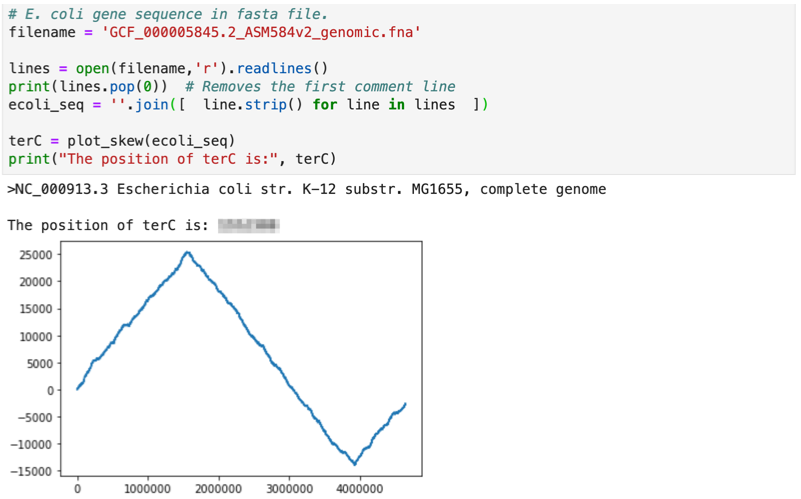

In [1]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def plot_skew(seq):
    GC_skew = [0]*len(seq)
    for idx in range(len(seq)):
        if seq[idx] == 'G':
            GC_skew[idx] = GC_skew[idx-1] + 1
        elif seq[idx] == 'C':
            GC_skew[idx] = GC_skew[idx-1] - 1
        else:
            GC_skew[idx] = GC_skew[idx-1]

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(GC_skew)
    
    ##################################################
    # Write your code here to solve the problem.
    #
    return GC_skew.index(max(GC_skew))

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome

The position of terC is: 1552388


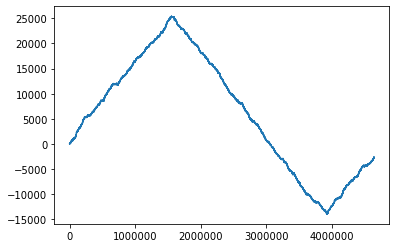

In [2]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

# E. coli gene sequence in fasta file.
filename = 'GCF_000005845.2_ASM584v2_genomic.fna' 

lines = open(filename,'r').readlines()
print(lines.pop(0))  # Removes the first comment line
ecoli_seq = ''.join([  line.strip() for line in lines  ])

terC = plot_skew(ecoli_seq)
print("The position of terC is:", terC)

---

#### Problem 2 (2 pt)

In the class, we wrote a function `retrieve_GenBank_info(id)` that retrieves a sequence information in the GenBank format from NCBI, saves it into a file, and returns the requence.

In this problem, your task is to convert this function to `retrieve_FASTA_info(id)` retreive a sequence in the **fasta** format, save it, and return it.  The saved file name should be `{id}.fna`, where {id} should be replaced by the actual id of the sequence.

The output should look like below:

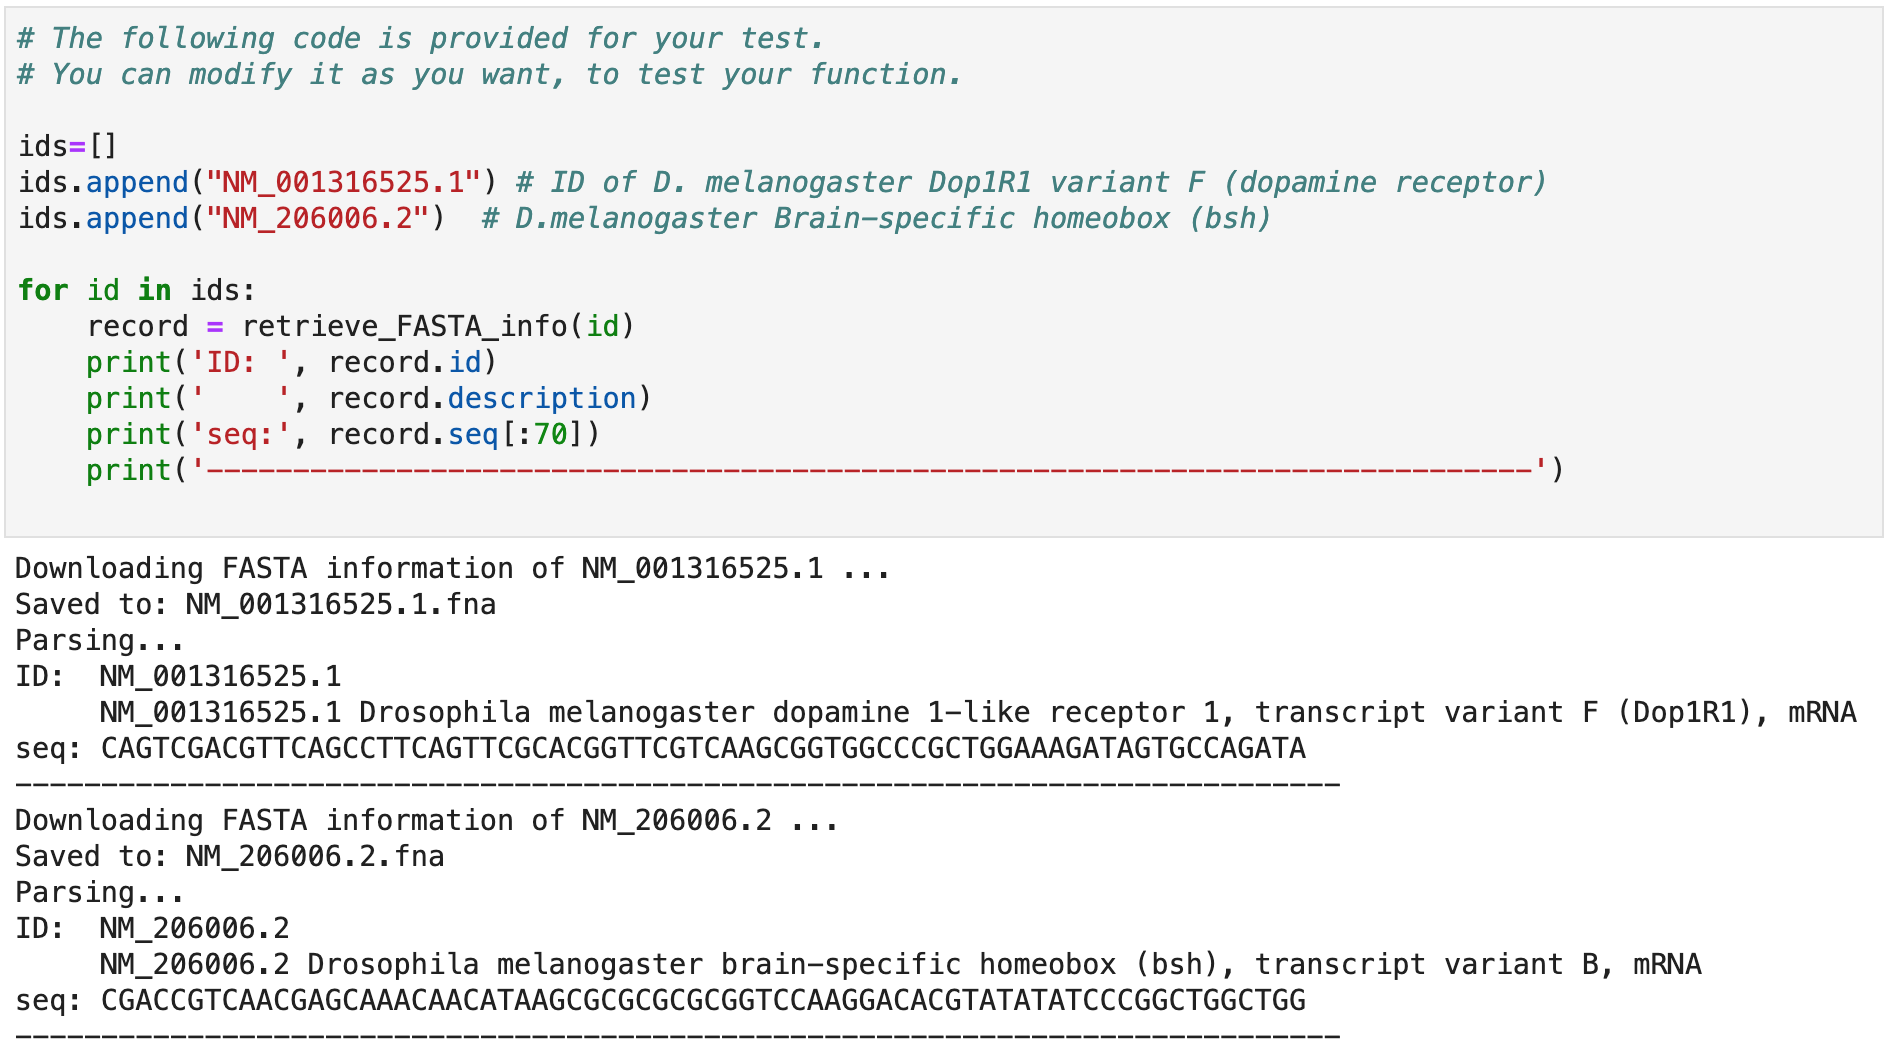

In [3]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
# Hint: See W04_2.ipynb
def retrieve_FASTA_info(id):
    filename = id + ".gbk"

    print("Downloading FASTA information of", id, "...")
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="gbwithparts", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "genbank")
    return record


In [4]:
#############################################################
# Answer

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
def retrieve_FASTA_info(id):
    filename = id + ".fna"

    print("Downloading FASTA information of", id, "...")
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="fasta", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "fasta")
    return record


In [5]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

ids=[]
ids.append("NM_001316525.1") # ID of D. melanogaster Dop1R1 variant F (dopamine receptor)
ids.append("NM_206006.2")  # D.melanogaster Brain-specific homeobox (bsh)

for id in ids: 
    record = retrieve_FASTA_info(id)
    print('ID: ', record.id)
    print('    ', record.description)
    print('seq:', record.seq[:70])
    print('-----------------------------------------------------------------------------')
    

Saved to: NM_001316525.1.fna
Parsing...
ID:  NM_001316525.1
     NM_001316525.1 Drosophila melanogaster dopamine 1-like receptor 1, transcript variant F (Dop1R1), mRNA
seq: CAGTCGACGTTCAGCCTTCAGTTCGCACGGTTCGTCAAGCGGTGGCCCGCTGGAAAGATAGTGCCAGATA
-----------------------------------------------------------------------------
Saved to: NM_206006.2.fna
Parsing...
ID:  NM_206006.2
     NM_206006.2 Drosophila melanogaster brain-specific homeobox (bsh), transcript variant B, mRNA
seq: CGACCGTCAACGAGCAAACAACATAAGCGCGCGCGCGGTCCAAGGACACGTATATATCCCGGCTGGCTGG
-----------------------------------------------------------------------------


---

#### Problem 3 (3 pt)

In this problem, your task is to combine the result of problem 1 and 2 and find the ***terC*** in *Helicobacter pylori 26695*, which is associated with peptic ulcers.

1. Visit https://www.ncbi.nlm.nih.gov/

2. Search "Genome" of "Helicobacter pylori 26695". (Hint: See lecture: W04_2 - 1 intro.)

3. Download the "fasta" file of this genome.

4. Open this fasta file and confirm in the first comment line that it is indeed *Helicobacter pylori 26695*.  (If it is *Helicobacter pylori Puno135*, you found a wrong one.)

5. You need the unique NCBI database ID in this comment line.

6. Complete the function `HW4_prob3(id)` that performs the following.

    A. Use the `retrieve_FASTA_info(id)` function in problem 2 to retrieve the sequence of *Helicobacter pylori 26695*, save it into a fasta file, and get the sequence.
    
    B. The return value of `retrieve_FASTA_info(id)` is `SeqRecord` object. This object has a member variable: `seq`. Use it as an argument to the `plot_skew(seq)` function in problem 1 to obtain the ***terC*** position.
    
    C. Return this final ***terC***


The outcome of this problem should look like below:

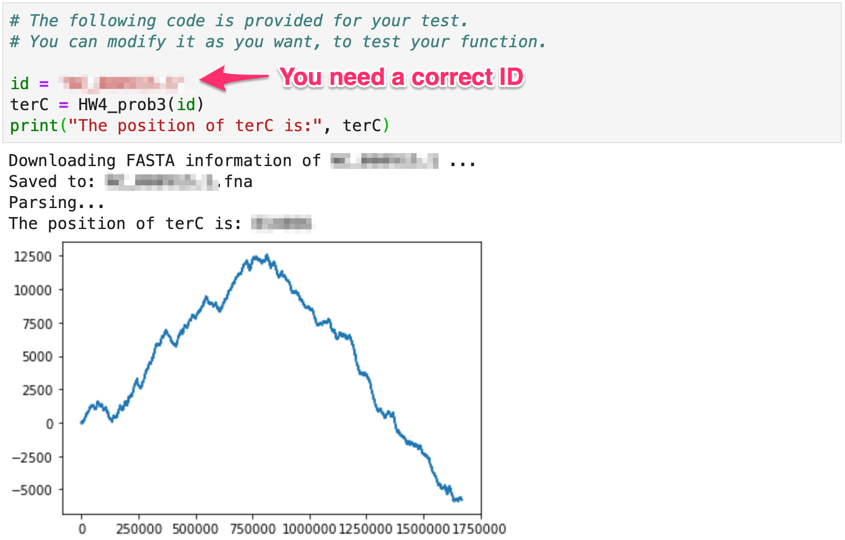

In [6]:
################################################################
# Run the cell of problem 1 to load the definition of plot_skew(seq) function.
# Do not copy & paste the function here.

################################################################
# Run the cell of problem 2 to load the definition of retrieve_FASTA_info(id) function.
# Do not copy & paste the function here.


# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def HW4_prob3(id):
    # Write your code to implement step 6.
    record = retrieve_FASTA_info(id)
    terC = plot_skew( record.seq  )
    return terC


Saved to: NC_000915.1.fna
Parsing...
The position of terC is: 814086


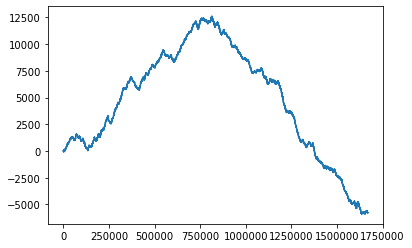

In [7]:
# Jon,
#
# It turned out that there are two versions of the complete genome of the 
# Helicobacter pylori 26695: 2014 version is CP003904.1 and 2020 version is NC_000915.1
# The result will give different answer: With NC000915.1, the result was 814086
# If it is CP003904.1, it is 814099.
#
# Best,
# Sung Soo

id = 'NC_000915.1'   # This is the 2020 version
terC = HW4_prob3(id)
print("The position of terC is:", terC)

Saved to: CP003904.1.fna
Parsing...
The position of terC is: 814099


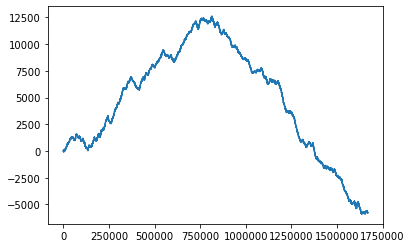

In [8]:
id = 'CP003904.1'   # This is 2014 version
terC = HW4_prob3(id)
print("The position of terC is:", terC)

---

#### Problem 4 (3 pt)

In this problem, we will use Biopython to translate the CDS sequence(s) in GenBank file.

1. First, use the `retrieve_GenBank_info(id)` to save the GenBank record of *Helicobacter pylori 26695*.  `id` is the id of helicobactor you found in Problem 3.  Remember: Make sure that the `rettype` option is `"gbwithparts"` for `efetch` in the `retrieve_GenBank_info` function to retrieve the whole record. The complete genome of Helicobactor is long and `rettype="gb"` option would only retrieve the summary. We need the entire genome for this problem.

2. Open the saved GenBank file. Confirm that the 2nd line reads:<br> "DEFINITION  Helicobacter pylori 26695, complete sequence."

3. Line 80 should read:<br> "FEATURES     Location/Qualifiers"<br>
   Below this line, you see annotations for each gene and its corresponding CDS (**C**o**D**ing **S**quence).

4. Running `gen = retrieve_GenBank_info(id)` returns a `SeqRecord` object, which contains all the annotation information and the whole genome sequence. <br>
    - `gen.features` is a list containing all the annotations of genes and CDS's you found in the GenBank file. For example, `gen.features[2]` contains CDS of gene "nusB". It also has the exact position information of the coding region (i.e., exon), using the Python indexing convention. Try running `print(gen.features[2])`. The type of each feature can be accessed by using `.type`. For example, `print( gen.features[2].type )` should be `CDS`.<br>
    - `gen.seq` is a `Seq` object containing the entire genome.<br><br>
    
5. To translate this CDS, you can simply run an embeded function `.translate(seq)` for this particular feature, where `seq` is the entire genome. For example, `gen.features[2].translate(gen.seq)` returns an amino acid sequence of "nusB" gene. Try running `gen.features[2].translate(gen.seq)` and compare the result to the actual list in the annotation of the GenBank file at line 104, which reads: <br>
  /translation="MATRTQARGAVVELLYAFESGNEEIKKIASSMLEEKKIKNNQLA <br>
  FALSLFNGVLEKINEIDALIEPHLKDWDFKRLGSMEKAILRLGAYEIGFTPTQNPIII <br>
  NECIELGKLYAEPNTPKFLNAILDSLSKKLTQKPLN" <br>

6. We will translate the first 10 CDS's found in this GenBank record. Complete a function that:

    A. Retrieve the GenBank record of Helicobactor using `gen=retrieve_GenBank_info(id)` (given in the function skeleton)
    
    B. Using a for-loop, check if the type of each feature in `gen.features` is `CDS`.
    
    C. If it is `CDS`, translate it and print it.
    
    D. Once you printed 10 CDS sequences, stop the loop and exit (use `break` keyword) the function.

The result should look like below:

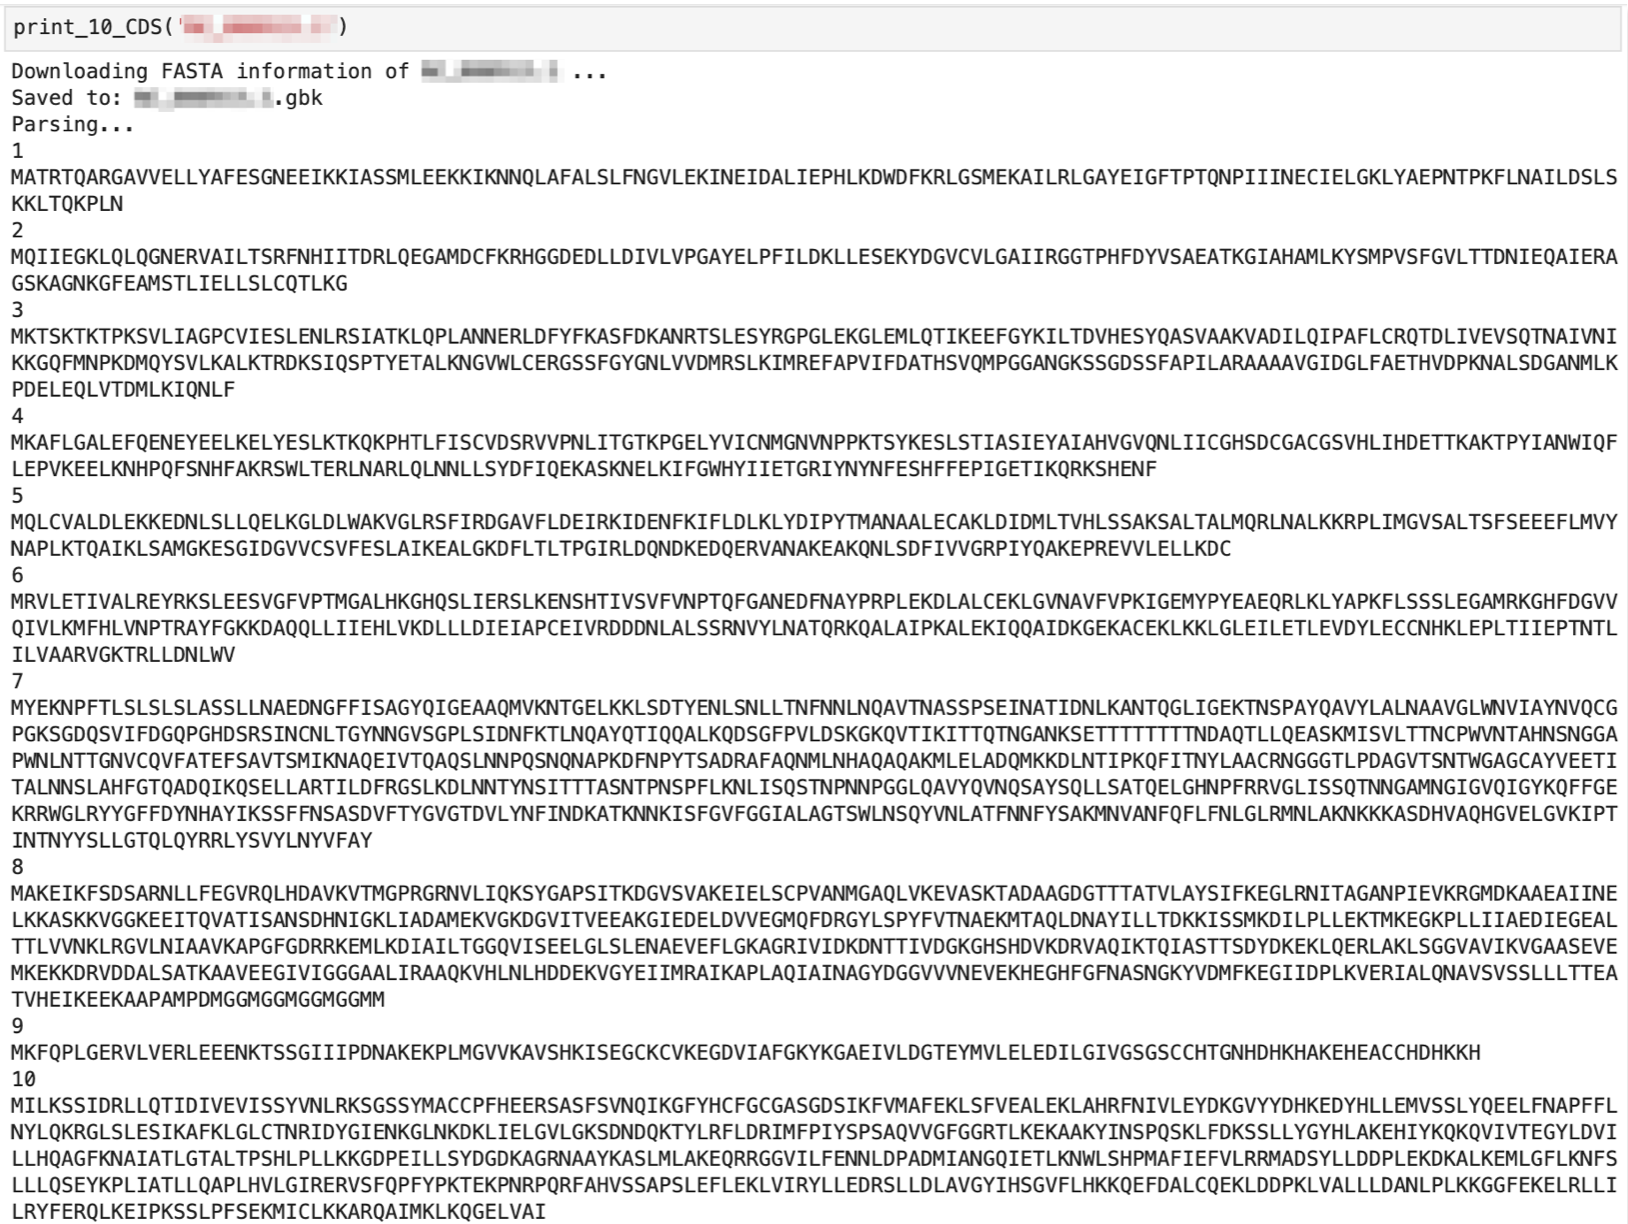

In [9]:
# This cell is given. The 'rettype' option of 'efetch()' has been taken care of.
# You should not need to modify this cell

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
# Hint: See W04_2.ipynb
def retrieve_GenBank_info(id):
    filename = id + ".gbk"

    print("Downloading FASTA information of", id, "...")
    # We are using "gbwithparts" option to retrieve the entire record, not summary
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="gbwithparts", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "genbank")
    return record

In [10]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def print_10_CDS(id):

    count = 0   # You may want to use a counter variable to keep a record of how many CDS's you printed
    gen = retrieve_GenBank_info(id) # Step A: retrieve the GenBank record

    # Step B: Then you perform a loop
    for idx in range(len(gen.features)):

        # Step C: Check is the type of each feature is 'CDS'
        if gen.features[idx].type == 'CDS':
            # increase the "count" and print it
            # print the amino acid sequence after translation (use "print()" function)
            count += 1
            print(count)
            print( gen.features[idx].translate(gen.seq) )
            # Step D: Exit the for-loop when you printed 10 amino acid sequences
            if count == 10:
                break
                

In [11]:
# Jon,
#
# It turned out that there are two versions of the complete genome of the 
# Helicobacter pylori 26695: 2014 version is CP003904.1 and 2020 version is NC_000915.1
# The result will give the same CDS sequences for the first few, but not after that.
# Either way, if you see the same result for the first 5 sequences, give full points.
#

print_10_CDS('NC_000915.1')
print_10_CDS('CP003904.1')

Saved to: NC_000915.1.gbk
Parsing...
1
MATRTQARGAVVELLYAFESGNEEIKKIASSMLEEKKIKNNQLAFALSLFNGVLEKINEIDALIEPHLKDWDFKRLGSMEKAILRLGAYEIGFTPTQNPIIINECIELGKLYAEPNTPKFLNAILDSLSKKLTQKPLN
2
MQIIEGKLQLQGNERVAILTSRFNHIITDRLQEGAMDCFKRHGGDEDLLDIVLVPGAYELPFILDKLLESEKYDGVCVLGAIIRGGTPHFDYVSAEATKGIAHAMLKYSMPVSFGVLTTDNIEQAIERAGSKAGNKGFEAMSTLIELLSLCQTLKG
3
MKTSKTKTPKSVLIAGPCVIESLENLRSIATKLQPLANNERLDFYFKASFDKANRTSLESYRGPGLEKGLEMLQTIKEEFGYKILTDVHESYQASVAAKVADILQIPAFLCRQTDLIVEVSQTNAIVNIKKGQFMNPKDMQYSVLKALKTRDKSIQSPTYETALKNGVWLCERGSSFGYGNLVVDMRSLKIMREFAPVIFDATHSVQMPGGANGKSSGDSSFAPILARAAAAVGIDGLFAETHVDPKNALSDGANMLKPDELEQLVTDMLKIQNLF
4
MKAFLGALEFQENEYEELKELYESLKTKQKPHTLFISCVDSRVVPNLITGTKPGELYVICNMGNVNPPKTSYKESLSTIASIEYAIAHVGVQNLIICGHSDCGACGSVHLIHDETTKAKTPYIANWIQFLEPVKEELKNHPQFSNHFAKRSWLTERLNARLQLNNLLSYDFIQEKASKNELKIFGWHYIIETGRIYNYNFESHFFEPIGETIKQRKSHENF
5
MQLCVALDLEKKEDNLSLLQELKGLDLWAKVGLRSFIRDGAVFLDEIRKIDENFKIFLDLKLYDIPYTMANAALECAKLDIDMLTVHLSSAKSALTALMQRLNALKKRPLIMGVSALTSFSEEEFLMVYNAPLKTQAIKLSAMGKESGIDGVVCSVFE

---
## **Check your code before you commit and push your homework**

### If there is any error in your code, including any practice code you wrote to test your answers, your homework will not be scored.

#### Here are steps you must take to make sure there is no error in your script.
1. You must first restart the kernel. It is in the menu "kernel->Restart Kernel". Or click the restart button.
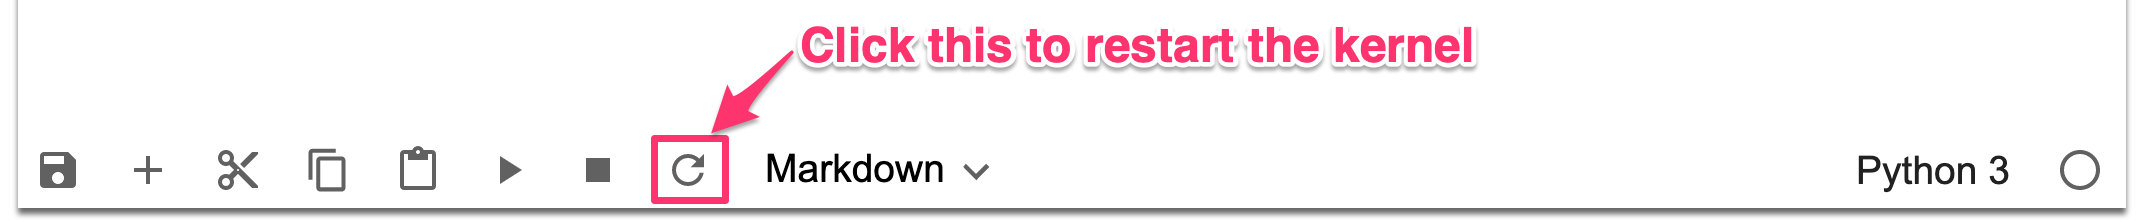
2. Run all cells. You can do this by clicking the menu "Run->Run all cells".
3. Fix any errors.
4. Repeate 1-3 until you don't see any errors.
5. **IMPORTNAT: Clear All Outputs (Right mouse click->Clear All Output)**
6. **IMPORTNAT: Save your file and change the filename to "HWn_Lastname_Firstname.ipynb"**
7. **Run the following cell and make sure you don't see any errors. This is the code that the TA or the instructor will use to generate testable code.**

In [ ]:
# If the name of the student is Abraham Lincoln, then the code should look
# like below.

!jupyter nbconvert --to script 'HW4_Lincoln_Abraham.ipynb'
import HW4_Lincoln_Abraham as hw  # Change this to your name
dir(hw)

# After running this code, you should see, at the bottom, the function names
# of your homework answers.

# If you see errors, please make sure the file names, module names are all
# properly set up. Then restart the kernel and try it again.


In [ ]:
id = 'NC_000915.1'
retrieve_FASTA_info(id)